In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from numpy.polynomial import Polynomial
from IPython.display import display, HTML

#### Константы

In [5]:
scale = 0.331 # 1 пиксель = 0.331 мм
# координаты воображаемой оси абсцисс
y01 = 345.5 # в месте пузыря
y02 = 349.5 # в месте пальца
t0 = 952 # номер первого кадра, когда началось развитие неустойчивости

#### Исходные данные

In [6]:
data = pd.read_excel('data2.xlsx')
display(HTML(data.to_html(index=False)))

"время, мс","пузырь, п","палец, п"
1075,271,419
1085,265,432
1095,257,454
1105,250,475
1115,236,502
1125,227,530
1135,220,560
1145,209,587
1155,197,614
1165,191,651


#### Преобразование исходных данных

In [7]:
data_new = pd.DataFrame()
data_new['t'] = data['время, мс'] - t0
data_new['(пузырь - y0), мм'], data_new['(палец - y0), мм'] = np.abs((data['пузырь, п'] - y01) * scale), np.abs((data['палец, п'] - y02) * scale)
data_new

,t,"(пузырь - y0), мм","(палец - y0), мм"
0,123,24.6595,23.0045
1,133,26.6455,27.3075
2,143,29.2935,34.5895
3,153,31.6105,41.5405
4,163,36.2445,50.4775
5,173,39.2235,59.7455
6,183,41.5405,69.6755
7,193,45.1815,78.6125
8,203,49.1535,87.5495
9,213,51.1395,99.7965


#### Расчёт констант

In [8]:
rho1, rho2 = 1.225, 998.2 # кг/м^3
A = (rho2 - rho1)/(rho2 + rho1)

lam = 125 # мм
g = 0.00982 # мм/мс^2
k = 2*np.pi/lam #1/мм

gamma = np.sqrt(A*g*k) # 1/мс

a0 = 3.75

print('A =', round(A, 3))
print('gamma =', round(gamma))
print('k =', round(k*1000, 6))

A = 0.998
gamma = 0
k = 50.265482


#### Теоретическая кривая

In [9]:
theor = a0 * np.cosh(data_new['t']*gamma)

x = data_new['t']
y = theor
n = len(x)

b = (n*(x*np.log(y)).sum() - x.sum()*np.log(y).sum())/(n*(x**2).sum() - x.sum()**2)
a = 1/n * np.log(y).sum() - b/n * x.sum()

x_left = np.linspace(0, min(data_new['t']), num = 100)
theor_exp_left = np.exp(a + b*x_left)
theor_right = theor

x_arr = np.concatenate([x_left, x], axis = 0)
theor_arr = np.concatenate([theor_exp_left, theor_right], axis = 0)



#### Графики

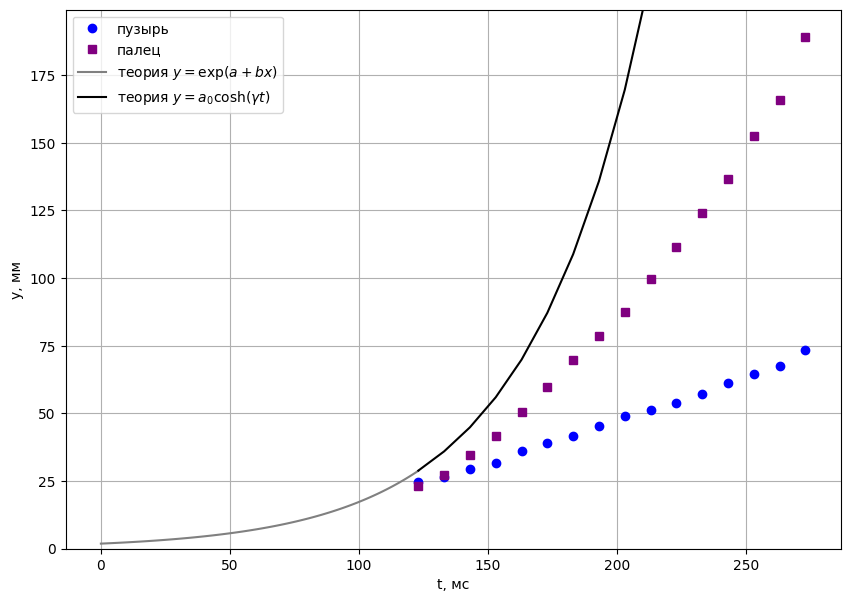

In [10]:
plt.figure(figsize = (10, 7))

plt.plot(data_new['t'], data_new['(пузырь - y0), мм'], 'o', color = 'blue', label = 'пузырь')
plt.plot(data_new['t'], data_new['(палец - y0), мм'], 's', color = 'purple', label = 'палец')
plt.plot(x_left, theor_exp_left, '-', color = 'gray', label = 'теория $y = \exp(a + b x)$')
plt.plot(x, theor_right, '-', color = 'black', label = 'теория $y = a_0 \cosh(\gamma t)$')

#theor_left = a0 * np.cosh(x_left*gamma)
#plt.plot(x_left, theor_exp_left, color = 'green')

plt.ylim(0, max(data_new['(палец - y0), мм'] + 10))

plt.xlabel('t, мс')
plt.ylabel('y, мм')

plt.grid()
plt.legend()
plt.show()

v =  0.319 м/с


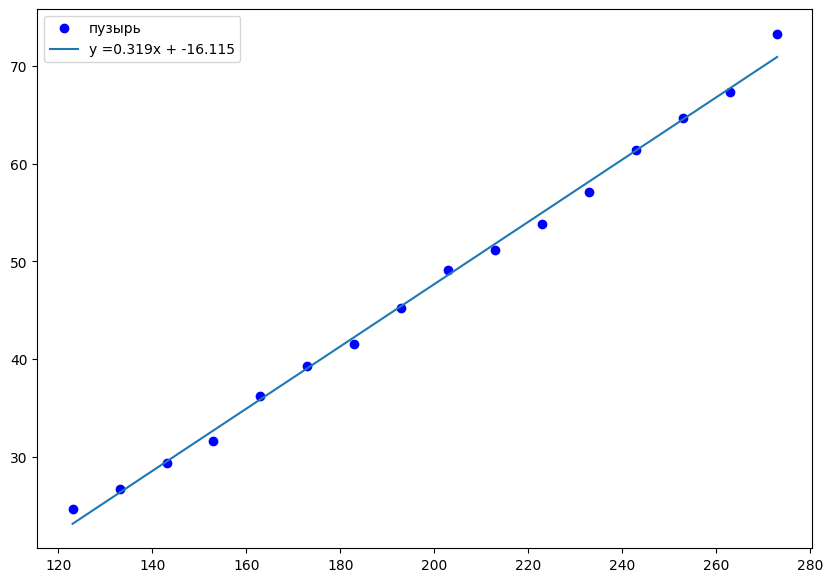

In [11]:
pol_lin = np.polyfit(data_new['t'], data_new['(пузырь - y0), мм'], 1)
lin = np.poly1d(pol_lin)(data_new['t'])

plt.figure(figsize = (10, 7))
plt.plot(data_new['t'], data_new['(пузырь - y0), мм'], 'o', color = 'blue', label = 'пузырь')
coeffs1 = [round(np.poly1d(pol_lin)[0], 3), round(np.poly1d(pol_lin)[1], 3)]
plt.plot(data_new['t'], lin, label = 'y =' + str(coeffs1[1]) + 'x + ' + str(coeffs1[0]))
plt.legend();

#(np.sqrt((np.abs(lin - data_new['(пузырь - y0), мм'])**2).sum() / (len(data_new['t']) + 1)))
print('v = ', round(np.poly1d(pol_lin)[1], 3), 'м/с')

a = 7.48 м/с²
std_пузырь = 1.9623699387779885
std_палец = 1.9205293918529882


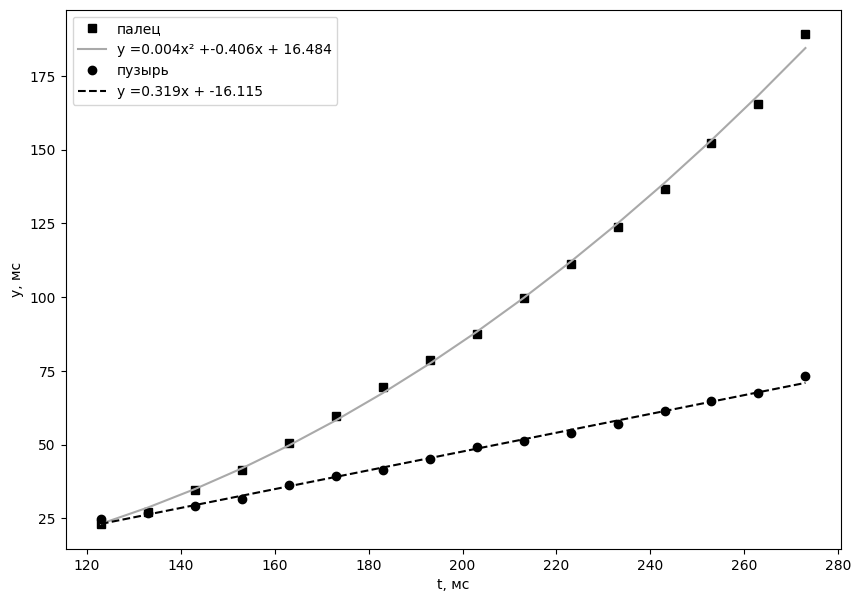

In [12]:
pol_sqr = np.polyfit(data_new['t'], data_new['(палец - y0), мм'], 2)
sqr = np.poly1d(pol_sqr)(data_new['t'])

plt.figure(figsize = (10, 7))
plt.plot(data_new['t'], data_new['(палец - y0), мм'], 's', color = 'black', label = 'палец')
coeffs = [round(np.poly1d(pol_sqr)[0], 3), round(np.poly1d(pol_sqr)[1], 3), round(np.poly1d(pol_sqr)[2], 3)]
plt.plot(data_new['t'], sqr, label = 'y =' + str(coeffs[2]) + 'x² +' + str(coeffs[1]) + 'x + ' + str(coeffs[0]), color = 'darkgray')

plt.plot(data_new['t'], data_new['(пузырь - y0), мм'], 'o', color = 'black', label = 'пузырь')
plt.plot(data_new['t'], lin, '--', label = 'y =' + str(coeffs1[1]) + 'x + ' + str(coeffs1[0]), color = 'black')

plt.legend();

np.sqrt((np.abs(sqr - data_new['(палец - y0), мм'])**2).sum() / (len(data_new['t']) + 1))

print('a =', round(np.poly1d(pol_sqr)[2]*2*10**3, 2), 'м/с²')

print('std_пузырь =', np.std(lin - data_new['(пузырь - y0), мм'])/np.mean(lin) * 100)
print('std_палец =', np.std(sqr - data_new['(палец - y0), мм'])/np.mean(sqr) * 100)

plt.xlabel('t, мс');
plt.ylabel('y, мс');

array([0.1227011])

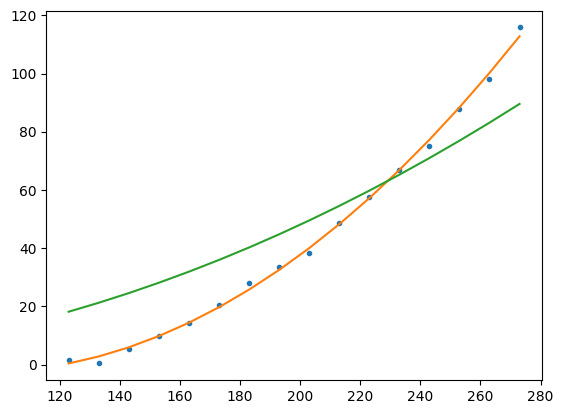

In [15]:
h = np.abs(data_new['(палец - y0), мм'] - data_new['(пузырь - y0), мм'])
plt.plot(data_new['t'], h, '.')

pol_sqr = np.polyfit(data_new['t'], h, 2)
sqr = np.poly1d(pol_sqr)(data_new['t'])

plt.plot(data_new['t'], sqr)

import scipy.optimize
arg, _ = scipy.optimize.curve_fit(lambda t,a: a*t**2,  data_new['t'],  h)
plt.plot(data_new['t'], arg*data_new['t']**2)
arg/A/g

In [16]:
data['t-t$_0$'] = data_new['t']
data['(палец - y$_0$), мм'] = round(data_new['(палец - y0), мм'], 1)
data['(пузырь - y$_0$), мм'] = round(data_new['(пузырь - y0), мм'], 1)
display(HTML(data.to_html(index=False)))

"время, мс","пузырь, п","палец, п",t-t$_0$,"(палец - y$_0$), мм","(пузырь - y$_0$), мм"
1075,271,419,123,23.0,24.7
1085,265,432,133,27.3,26.6
1095,257,454,143,34.6,29.3
1105,250,475,153,41.5,31.6
1115,236,502,163,50.5,36.2
1125,227,530,173,59.7,39.2
1135,220,560,183,69.7,41.5
1145,209,587,193,78.6,45.2
1155,197,614,203,87.5,49.2
1165,191,651,213,99.8,51.1


In [19]:
from pandas import ExcelWriter
writer = ExcelWriter('data_new.xlsx')
data.to_excel(writer,'Sheet5')
writer.save();

/var/folders/4c/jxtjbvn16bx202hq56v9qnxm0000gn/T/ipykernel_30254/2646551695.py:4: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save();


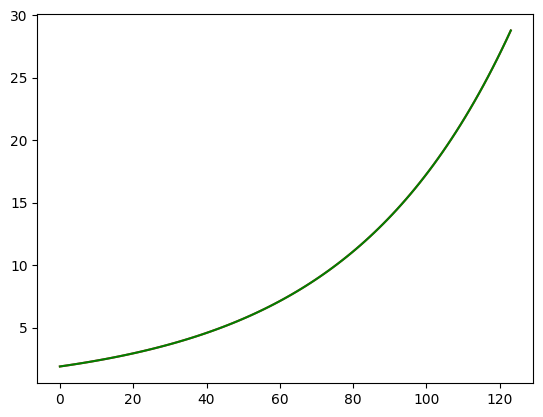

In [20]:
theor_exp_left = np.exp(a + b*x_left)
plt.plot(x_left, theor_exp_left, '-', color = 'crimson', label = 'теория $y = \exp(a + b x)$')

theor_left = a0 * np.cosh(x_left*gamma)
plt.plot(x_left, theor_exp_left, color = 'green')

1.8838184181395745 exp(0.02217006571221132x)


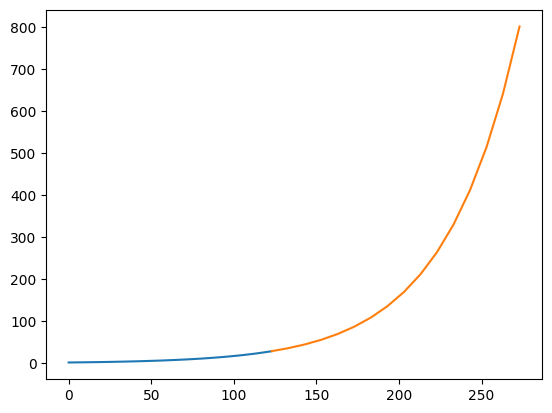

In [21]:
a0 * np.cosh(x_left*gamma), np.exp(a + b*x_left)
plt.plot(x_left, np.exp(a + b*x_left))
print(np.exp(a), 'exp(' + str(b) + 'x)')
plt.plot(data_new['t'], theor)